In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os 
import random
from datetime import datetime

# load prepared files and data

In [2]:
# 导入之前建好的文件
population = pd.read_csv('C:/Users/11424/Desktop/PhD/深圳市疫情课题/population data for ABM.csv',index_col=0)
workplace = pd.read_csv('C:/Users/11424/Desktop/PhD/深圳市疫情课题/workplace.csv',index_col=0)
home_community = pd.read_excel('C:/Users/11424/Desktop/PhD/深圳市疫情课题/community.xlsx')
transportation = pd.read_excel('C:/Users/11424/Desktop/PhD/深圳市疫情课题/public transport.xlsx')
contact_value = pd.read_csv(r'C:/Users/11424/Desktop/PhD/深圳市疫情课题/hongkong close contact rate.csv',index_col=0)
scale = pd.read_csv(r'C:/Users/11424/Desktop/PhD/深圳市疫情课题/scale.csv')
infectious_probability = pd.read_csv(r'C:/Users/11424/Desktop/PhD/深圳市疫情课题/infectious ability.csv',index_col=0)

In [3]:
population['neighbor_id'] = population['neighbor_id'].astype('str')

In [4]:
population

,id,household_id,age,occupation,neighborhood,neighbor_id,workplace,transport propensity,health status
0,0,0,3,3,2,24,112,0,0
1,1,1,4,5,2,22,110,0,0
2,2,2,3,3,2,26,104,0,0
3,3,2,2,2,2,26,8,0,0
4,4,3,2,2,1,12,8,0,0
...,...,...,...,...,...,...,...,...,...
3795,3795,1997,3,3,2,26,181,0,0
3796,3796,1998,2,2,2,22,8,0,0
3797,3797,1998,3,4,2,22,16,0,0
3798,3798,1998,2,2,2,22,8,0,0


In [5]:
home_community

,名称,经度,纬度,地址,type,community_id
0,职工宿舍,114.061394,22.635534,广东省深圳市龙岗区坂田街道坂田小学教职工宿舍,c1_dormitory,c_11
1,坂田派出所宿舍,114.053909,22.631110,广东省深圳市龙岗区坂田街道布龙路610号坂田派出所宿舍,c1_dormitory,c_12
2,南坑村宿舍,114.061174,22.611140,广东省深圳市龙岗区布吉新区坂田光雅南坑幼儿园东(南顺路东),c1_dormitory,c_13
3,中坡工业园F栋员工宿舍,114.060949,22.632486,广东省深圳市龙岗区发达路7号附近,c1_dormitory,c_14
4,旺塘,114.076749,22.632498,坂田街道办杨美村,c3_city village,c_21
5,禾塘光村统建楼,114.071145,22.628498,广东省深圳市龙岗区坂田街道马安堂社区禾塘光村统建楼,c3_city village,c_22
6,石化新村-37栋,114.056453,22.620736,广东省深圳市龙岗区坂田石化坂田新村(五和大道东),c3_city village,c_23
7,石化小区-5栋,114.056094,22.619723,广东省深圳市龙岗区坂田五和中路光雅园村,c3_city village,c_24
8,石化新村-50栋,114.056842,22.621141,广东省深圳市龙岗区坂田五和中路光雅园村,c3_city village,c_25
9,石化新村-48栋,114.056575,22.621232,广东省深圳市龙岗区坂田五和中路光雅园村,c3_city village,c_26


In [6]:
transportation

,transport_id,long,lat,type,name
0,tr_1,114.068012,22.630459,und,坂田地铁站
1,tr_2,114.065254,22.630887,und,坂田地铁站-D口
2,tr_3,114.055791,22.630481,und,五和地铁站-C口
3,tr_4,114.075721,22.629561,und,杨美地铁站-C口
4,tr_5,114.075360,22.629035,und,杨美地铁站-B口
5,tr_6,114.055820,22.628846,und,五和地铁站-B口
6,tr_7,114.062566,22.615020,bus,万科第五园公交总站
7,tr_8,114.055745,22.622039,bus,光雅园路口
8,tr_9,114.050575,22.633298,bus,大发埔村路口
9,tr_10,114.055653,22.621822,bus,光雅园路口


In [7]:
home_id = list(set(home_community['community_id']))
home_id.sort()
workplace_id = list(set(workplace['workplace_id']))
workplace_id.sort()
transport_id = list(set(transportation['transport_id']))
transport_id.sort()

In [8]:
workplace

,workplace_id,名称,long,lat,地址,分类,type
0,w_0,坂田第二工业区4栋,114.050135,22.635929,广东省深圳市龙岗区龙华中裕冠大道龙壁工业区,;其他,other
1,w_1,高石集团B厂,114.078465,22.626527,中兴路东150米,;厂矿,factory
2,w_2,山海电商产业园,114.060538,22.634434,中坑街与长发路交叉口东北100米,;园区,industry
3,w_3,深圳市仁国机电工程有限公司,114.057022,22.634510,长坑路27号附近,;公司,company
4,w_4,胜世广告,114.053675,22.633258,长发西路13-4号,;公司,company
...,...,...,...,...,...,...,...
197,w_197,坂田第三工业区,114.061814,22.636536,坂田新街15号附近,;园区,industry
198,w_198,鸿邦印务,114.055350,22.631861,坂田五和中路5号2楼,;公司,company
199,w_199,红牌广告,114.055305,22.624342,坂田五和南路77号1楼,;公司,company
200,w_200,深圳鑫品唐广告印务有限公司,114.081682,22.627130,坂田龙景工业园D栋三楼,;公司,company


## assign the workplace,shopping or other trips

In [9]:
# school id
school_id = workplace[workplace['type']=='campus']['workplace_id'].values

In [10]:
# factory_id
factory_id = workplace[workplace['type']=='factory']['workplace_id'].values

In [11]:
# shopping/leisure id 
shopping_id = workplace[(workplace['type']=='shopping')|(workplace['type']=='pharmacy')]['workplace_id'].values


In [12]:
space_id = home_id + workplace_id + transport_id

In [13]:
space_id

['c_11',
 'c_12',
 'c_13',
 'c_14',
 'c_21',
 'c_22',
 'c_23',
 'c_24',
 'c_25',
 'c_26',
 'c_27',
 'c_31',
 'c_32',
 'c_33',
 'c_34',
 'c_35',
 'c_36',
 'c_37',
 'c_38',
 'c_39',
 'w_0',
 'w_1',
 'w_10',
 'w_100',
 'w_101',
 'w_102',
 'w_103',
 'w_104',
 'w_105',
 'w_106',
 'w_107',
 'w_108',
 'w_109',
 'w_11',
 'w_110',
 'w_111',
 'w_112',
 'w_113',
 'w_114',
 'w_115',
 'w_116',
 'w_117',
 'w_118',
 'w_119',
 'w_12',
 'w_120',
 'w_121',
 'w_122',
 'w_123',
 'w_124',
 'w_125',
 'w_126',
 'w_127',
 'w_128',
 'w_129',
 'w_13',
 'w_130',
 'w_131',
 'w_132',
 'w_133',
 'w_134',
 'w_135',
 'w_136',
 'w_137',
 'w_138',
 'w_139',
 'w_14',
 'w_140',
 'w_141',
 'w_142',
 'w_143',
 'w_144',
 'w_145',
 'w_146',
 'w_147',
 'w_148',
 'w_149',
 'w_15',
 'w_150',
 'w_151',
 'w_152',
 'w_153',
 'w_154',
 'w_155',
 'w_156',
 'w_157',
 'w_158',
 'w_159',
 'w_16',
 'w_160',
 'w_161',
 'w_162',
 'w_163',
 'w_164',
 'w_165',
 'w_166',
 'w_167',
 'w_168',
 'w_169',
 'w_17',
 'w_170',
 'w_171',
 'w_172',
 '

In [14]:
# all other employed people have the job
# student = 1
occu0_list =population[population['occupation']==0]['id'].values
occu1_list =population[population['occupation']==1]['id'].values
occu2_list =population[population['occupation']==2]['id'].values
occu3_list =population[population['occupation']==3]['id'].values
occu4_list =population[population['occupation']==4]['id'].values
occu5_list =population[population['occupation']==5]['id'].values

In [15]:
new_population = population.copy()

In [16]:
new_population['work place']=0
for i in list(set(population['id'])):
    if i in occu0_list: #unemployed 
        new_population.loc[new_population['id']==i,'work place']=0
    if i in occu1_list:
        new_population.loc[new_population['id']==i,'work place']=np.random.choice(list(school_id), 
                                                                        p = np.array([1/len(school_id)]*len(school_id)).ravel()).split('_')[1]
    if i in occu2_list:
        new_population.loc[new_population['id']==i,'work place']=np.random.choice(list(factory_id), 
                                                                        p = np.array([1/len(factory_id)]*len(factory_id)).ravel()).split('_')[1]
    else:
        new_population.loc[new_population['id']==i,'work place']=np.random.choice(list(workplace_id),
                                                                        p=np.array([1/len(workplace_id)]*len(workplace_id)).ravel()).split('_')[1]
        

In [ ]:
new_population

In [17]:
# 每个时刻每个地区环境下有多少人；
scale_matrix = pd.DataFrame(columns=range(24),index=space_id).fillna(0)
for i in scale_matrix.index:
    if i in workplace_id:
        scale_matrix.loc[i,:]=scale.loc[0,workplace[workplace['workplace_id']==i]['type']].values[0]
    if i in home_id:
        scale_matrix.loc[i,:]=scale.loc[0,home_community[home_community['community_id']==i]['type']].values[0]
    if i in transport_id:
        scale_matrix.loc[i,:]=scale.loc[0,transportation[transportation['transport_id']==i]['type']].values[0]

In [18]:
scale_matrix

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
c_11,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
c_12,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
c_13,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
c_14,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
c_21,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tr_5,40,40,40,40,40,40,40,40,40,40,...,40,40,40,40,40,40,40,40,40,40
tr_6,40,40,40,40,40,40,40,40,40,40,...,40,40,40,40,40,40,40,40,40,40
tr_7,25,25,25,25,25,25,25,25,25,25,...,25,25,25,25,25,25,25,25,25,25
tr_8,25,25,25,25,25,25,25,25,25,25,...,25,25,25,25,25,25,25,25,25,25


## assign the contact value

In [19]:
# 每个时刻每个地方的流动性，或者说接触频率；这里先建立一个base matrix，每个agent会根据年龄不同，而有所调整（乘以调整系数）
contact_matrix_age1  = pd.DataFrame(columns=range(24),index=space_id).fillna(0)
for j in contact_matrix_age1.index:      
    if j in workplace_id:
        contact_matrix_age1.loc[j,:]=contact_value.loc[1,workplace[workplace['workplace_id']==j]['type']].values[0]
    if j in home_id:
        contact_matrix_age1.loc[j,:]=3.36
    if j in transport_id:
        contact_matrix_age1.loc[j,:]=contact_value.loc[1,transportation[transportation['transport_id']==j]['type']].values[0]
    

In [20]:
contact_matrix_age2  = pd.DataFrame(columns=range(24),index=space_id).fillna(0)
for j in contact_matrix_age2.index:      
    if j in workplace_id:
        contact_matrix_age2.loc[j,:]=contact_value.loc[2,workplace[workplace['workplace_id']==j]['type']].values[0]
    if j in home_id:
        contact_matrix_age2.loc[j,:]=2.52
    if j in transport_id:
        contact_matrix_age2.loc[j,:]=contact_value.loc[2,transportation[transportation['transport_id']==j]['type']].values[0] 

In [21]:
contact_matrix_age3  = pd.DataFrame(columns=range(24),index=space_id).fillna(0)
for j in contact_matrix_age3.index:      
    if j in workplace_id:
        contact_matrix_age3.loc[j,:]=contact_value.loc[3,workplace[workplace['workplace_id']==j]['type']].values[0]
    if j in home_id:
        contact_matrix_age3.loc[j,:]=2.64
    if j in transport_id:
        contact_matrix_age3.loc[j,:]=contact_value.loc[3,transportation[transportation['transport_id']==j]['type']].values[0] 

In [22]:
contact_matrix_age4  = pd.DataFrame(columns=range(24),index=space_id).fillna(0)
for j in contact_matrix_age4.index:      
    if j in workplace_id:
        contact_matrix_age4.loc[j,:]=contact_value.loc[4,workplace[workplace['workplace_id']==j]['type']].values[0]
    if j in home_id:
        contact_matrix_age4.loc[j,:]=2.4
    if j in transport_id:
        contact_matrix_age4.loc[j,:]=contact_value.loc[4,transportation[transportation['transport_id']==j]['type']].values[0]

In [23]:
contact_matrix_age5  = pd.DataFrame(columns=range(24),index=space_id).fillna(0)
for j in contact_matrix_age5.index:      
    if j in workplace_id:
        contact_matrix_age5.loc[j,:]=contact_value.loc[5,workplace[workplace['workplace_id']==j]['type']].values[0]
    if j in home_id:
        contact_matrix_age5.loc[j,:]=1.9
    if j in transport_id:
        contact_matrix_age5.loc[j,:]=contact_value.loc[5,transportation[transportation['transport_id']==j]['type']].values[0]

In [34]:
contact_matrixs = [contact_matrix_age1,contact_matrix_age2,contact_matrix_age3,contact_matrix_age4,contact_matrix_age5]

In [25]:
contact_value

,c1_dormitory,c2_neighborhood,c3_city village,company,industry,other,shopping,campus,factory,garden,pharmacy,bus,und
1,3.36,2.8,3.08,0.3,0.3,5.9,7.8,2.6,0.3,1.9,1.9,2.0,2.0
2,2.52,2.1,2.31,1.5,1.5,5.1,7.0,0.7,2.0,1.9,1.9,1.4,1.4
3,2.64,2.2,2.42,2.0,2.0,5.1,8.3,0.2,2.5,3.1,3.1,2.7,2.7
4,2.40,2.0,2.20,1.5,1.5,4.1,7.0,0.7,1.8,3.2,3.2,1.8,1.8
5,1.92,1.6,1.76,0.4,0.4,2.5,5.5,0.0,0.8,2.9,2.9,1.1,1.1


In [26]:
# 每个时刻每个地方的环境感染风险，与个人年龄有关，这里是一个base matrix，之后每个agent会根据年龄不同有所调整；
base_infectious_matrix = pd.DataFrame(columns=range(24),index=space_id).fillna(0)
for k in base_infectious_matrix.index:
    if k in workplace_id:
        base_infectious_matrix.loc[k,:]=infectious_probability.loc[4,workplace[workplace['workplace_id']==k]['type']].values[0]
    if k in home_id:
        base_infectious_matrix.loc[k,:]=infectious_probability.loc[4,home_community[home_community['community_id']==k]['type']].values[0]
    if k in transport_id:
        base_infectious_matrix.loc[k,:]=infectious_probability.loc[4,transportation[transportation['transport_id']==k]['type']].values[0]

In [27]:
infectious_probability

,c1_dormitory,c2_neighborhood,c3_city village,company,industry,other,shopping,campus,factory,garden,pharmacy,bus,und
1,1.0,0.9,1.2,0.9,1.0,1.0,0.9,0.9,1.0,1.0,0.9,0.9,0.9
2,1.1,1.0,1.3,1.0,1.1,1.1,1.0,1.0,1.1,1.1,1.0,1.0,1.0
3,1.1,1.1,1.4,1.1,1.1,1.1,1.1,1.1,1.1,1.1,1.1,1.1,1.1
4,1.8,2.0,1.4,2.0,1.8,1.8,2.0,2.0,1.8,1.8,2.0,2.0,2.0
5,3.0,2.0,4.0,2.0,3.0,3.0,2.0,2.0,3.0,3.0,2.0,2.0,2.0


## public transport station

In [28]:
# define the public trends of each station

# yangmei station am peak
ym_am = [0.00025,0.00025,0.075,0.292,0.43,0.186,0.0165]
# bantian 
bt_am = [0.0874,0.343,0.357,0.190,0.0226]
# bus station
bus_am = [0.000022,0.005261,0.144554,0.442992,0.313633,0.093537+9.999999999177334e-07]


In [29]:
### simulation 函数
### 输入是population的每一行信息；输出的是每个人的当天时空矩阵以及当天的健康状态
def SimIMBP_shenzhen(series):

    
############################################Build the spatial-temporal matrix first###################
    # initialise the dataframe
    p1_d1 = pd.DataFrame(columns=range(24),index=space_id)
    p1_d1 = p1_d1.fillna(0)
    
    home_id = list(set(home_community['community_id']))
    # distribute the workplace
    workplace_id = list(set(workplace['workplace_id']))
    transport_id = list(set(transportation['transport_id']))
    
    if series['health status']==-2:
        p1_d1.loc['c_'+str(series['neighbor_id']),:] = 1
    else:
        if series['occupation'] != 0:
        # assign the morning commuting time
            # according to the empirical distribution,random assign the public station here
            # [1,2,3] = station a,b, and bus station
            station = np.random.randint(1,4)
            if station==1:
                commute_morning =np.random.choice(list(range(4,11)), p = ym_am)
                p1_d1.loc['c_'+str(series['neighbor_id']),0:commute_morning] = 1
            if station==2:
                commute_morning =np.random.choice(list(range(6,11)), p = bt_am)
                p1_d1.loc['c_'+str(series['neighbor_id']),0:commute_morning] = 1
            if station==3:
                commute_morning =np.random.choice(list(range(4,10)), p = bus_am)
                p1_d1.loc['c_'+str(series['neighbor_id']),0:commute_morning] = 1
        # assign the commute mode choice: 0/private 1/public
        # mode = np.random.choice([0,1],np.array([1-series['transport propensity'],series['transport propensity']]))
        
        # assign the workplace and working hours
        
            work_space = 'w'+'_'+str(series['work place'])
            # working hours follow the normal distribution, mean=9, std=1
            work_hours = round(np.random.normal(loc=9, scale=1))
        
            if np.random.uniform() < series['transport propensity'] : # use the public transport
            
            # here is still a stochastic way, but later could be fitted by other mode choice modelling
                # assign the route
                if station==1: # yangmei
                    commute_station = random.choice(['tr_1','tr_2','tr_3'])
                if station==2: # bantian
                    commute_station = random.choice(['tr_4','tr_5','tr_6'])
                if station==3: #bus
                    commute_station = random.choice(['tr_7','tr_8','tr_9','tr_10','tr_11','tr_12',
                                                     'tr_13','tr_14','tr_15','tr_16','tr_17',
                                                     'tr_18','tr_19','tr_20','tr_21','tr_22'])
                p1_d1.loc[commute_station,commute_morning:commute_morning+1] = 1
            
            # step to the workplace
                p1_d1.loc[work_station,commute_morning+1:commute_morning+1+work_hours] = 1
            
                
                
            # back home using the same transport mode and route
                p1_d1.loc[commute_station,commute_morning+1+work_hours:commute_morning+1+work_hours+1] = 1
            
            
                # go shopping if still have time (<10pm), 40% go shopping or other trips
                if commute_morning+1+work_hours+1<22:
                    if np.random.uniform()<0.41:
                        shopping_des = random.choice(shopping_id)
                        p1_d1.loc[shopping_des,commute_morning+work_hours+2:commute_morning+work_hours+3] = 1
                        p1_d1.loc['c_'+str(series['neighbor_id']),commute_morning+work_hours+3:24] = 1
                    else:
                        p1_d1.loc['c_'+str(series['neighbor_id']),commute_morning+1+work_hours+1:24] = 1
                else:
                    # stay at the neighborhood
                    p1_d1.loc['c_'+str(series['neighbor_id']),commute_morning+1+work_hours+1:24] = 1
            
            else: # use the private car, assume it arrives the destination within an hour
            
            # step to the workplace
                p1_d1.loc[work_space,commute_morning+1:commute_morning+work_hours+1] = 1
            # step to the shopping trips, if still have time
                if commute_morning+work_hours+1<22:
                    # the probability is larger than people who take public transport
                    if np.random.uniform()<0.51:
                        shopping_des = random.choice(shopping_id)
                        p1_d1.loc[shopping_des,commute_morning+work_hours+1:commute_morning+work_hours+2] = 1
                    else:
                        p1_d1.loc['c_'+str(series['neighbor_id']),commute_morning+1+work_hours+1:24] = 1
                else:
                    p1_d1.loc['c_'+str(series['neighbor_id']),commute_morning+1+work_hours+1:24] = 1
            # stay at the neighborhood
                p1_d1.loc['c_'+str(series['neighbor_id']),commute_morning+work_hours+1:24] = 1
        if series['occupation']==0:
        # do the random walk around the community and other locations
            leave_home = np.random.randint(4,22)
            destinations = random.choice(list(p1_d1.index.values))
            stay_hours = np.random.randint(2,7)
        
        # assign the space_time matrix
            p1_d1.loc['c_'+str(series['neighbor_id']),0:leave_home] = 1
            p1_d1.loc[destinations,leave_home+1:min(24,leave_home+stay_hours)]=1
            p1_d1.loc['c_'+str(series['neighbor_id']),min(24,leave_home+stay_hours):24]=1

        
    return p1_d1,series['health status']        

In [30]:
############################### generate the trajectory for everyone######################################### 
##### 根据个人时空矩阵生成轨迹点序列（输出为第三方可视化api的数据格式），可选项
def gen_trajectory(series,personal_matrix,date_t):
    date = date_t
    p1_d1 = personal_matrix
    person_traj = pd.DataFrame(columns=['id','location_id','long','lat','time','date','datetime','status'],index=range(24))
    person_id = series['id']
    for i in range(24):
        # assign the person id
        person_traj['id'] = person_id
        # assign the location id at time i
        temporal_location = p1_d1[p1_d1[i]==1].index[0]
        person_traj.loc[i,'location_id'] = temporal_location
        # get the location information according to the id
        if temporal_location in workplace_id:
            random_error = np.random.uniform(-0.0001,0.0001)
            person_traj.loc[i,'long'] = workplace[workplace['workplace_id']==temporal_location]['long'].values+random_error
            person_traj.loc[i,'lat'] = workplace[workplace['workplace_id']==temporal_location]['lat'].values+random_error
        
        if temporal_location in home_id:
            random_error = np.random.uniform(-0.0001,0.0001)
            person_traj.loc[i,'long'] = home_community[home_community['community_id']==temporal_location]['经度'].values+random_error
            person_traj.loc[i,'lat'] = home_community[home_community['community_id']==temporal_location]['纬度'].values+random_error
        
        if temporal_location in transport_id:
            random_error = np.random.uniform(-0.0001,0.0001)
            person_traj.loc[i,'long'] = transportation[transportation['transport_id']==temporal_location]['long'].values+random_error
            person_traj.loc[i,'lat'] = transportation[transportation['transport_id']==temporal_location]['lat'].values+random_error
    
        # get the date and time
        person_traj.loc[i,'time'] = i
        person_traj.loc[i,'date'] = date
        # 从2022年3月开始模拟
        person_traj.loc[i,'datetime'] = datetime(2022, 3, date, i, np.random.randint(0,59))
    
    person_traj['status']=series['health status']
    
    return person_traj

# Simulate the whole process*

第一步：生成每个人的活动矩阵，阳性患者的活动密度，群体的活动密度；  
第二步： 根据每个人的活动轨迹和与阳性患者接触的概率，计算每个人当天被感染的风险  
  
每个人的健康状态被分为 susceptible（0）， exposed（1），infected（2），recovered（-1） 和 dead（-2）；

In [32]:
from datetime import datetime

In [47]:
# set the simulation period
days = 30

# 建立空表以储存模拟结果

date = []
S = [] # label 0
E = [] # label 1
I = [] # label 2
R = [] # label -1
D = [] # label -2
from tqdm import tqdm


# initialise the health status () 初始化研究范围内的病例数。
new_population['health status'] = np.random.choice([0,1,2,-1,-2],size=len(new_population),p=[0.999,0,0.001,0,0])

# 每一天：
for simulate_date in tqdm(range(days)):
    
    all_trajectories = []
    
    # 统计各个健康状态的人数record the date, and cases
    date.append(datetime(2022,3,simulate_date+1))
    
    S.append(len(new_population[new_population['health status']==0]))
    E.append(len(new_population[new_population['health status']==1]))
    I.append(len(new_population[new_population['health status']==2]))
    R.append(len(new_population[new_population['health status']==-1]))
    D.append(len(new_population[new_population['health status']==-2]))
    print('susceptible: %s, exposed: %e, infected: %i, recovered: %r dead: %r on date: %d' %(S[simulate_date],E[simulate_date],I[simulate_date],R[simulate_date],D[simulate_date],simulate_date))
    
    
    # 建立一系列矩阵，分别储存这天内的群体密度矩阵，以及阳性患者的活动矩阵密度
    day_i=pd.DataFrame(columns=range(24),index=space_id).fillna(0)
    #trajectories = []
    #population_matrix = pd.DataFrame(columns=range(24),index=space_id).fillna(0)
    infected_matrix = pd.DataFrame(columns=range(24),index=space_id).fillna(0)
    person1_st_matrix = []
    contact = []
    infectious = []


    simulation_population = tqdm(range(len(new_population)))
    
    ## 生成每个人的活动轨迹矩阵
    for i in simulation_population:
    # get the personal matrix, for each agent,
        personal_matrix,health_status = SimIMBP_shenzhen(new_population.iloc[i,:])
        
        # save the trajectory
        #personal_trjectory = gen_trajectory(new_population.iloc[i,:],personal_matrix,simulate_date+1)
        #trajectories.append(personal_trjectory)
        
        if health_status==2:
            infected_matrix = infected_matrix + personal_matrix
        day_i = day_i + personal_matrix
        person1_st_matrix.append(personal_matrix)
        #personal_traj = gen_trajectory(population.iloc[i,:],personal_matrix,1)
        #trajectories.append(personal_traj)
    
        ## calculate the risk
        # contact matrix
        age_group = new_population.loc[i,'age']
        contact_matrix = contact_matrixs[age_group-1]/12
        # 每个时刻每个地方的流动性，或者说接触频率；这里先建立一个base matrix，每个agent会根据年龄不同，而有所调整（乘以调整系数）
        
    
    
        contact.append(contact_matrix)
    
        
        # infectious matrix
        infectious_ability = 0.1
        infectious_matrix = (age_group)*base_infectious_matrix/5
    
        infectious.append(infectious_matrix)
        
        
    # 根据公式计算每个人这天的感染几率，并更新健康状态  update the health status
    for n in tqdm(range(len(population))):
        if new_population.loc[n,'health status']==0:
            probability = 1/((day_i+1)*scale_matrix)*infectious[n]*contact[n]*person1_st_matrix[n]*infected_matrix
            probability = probability.sum().sum()
            if np.random.uniform()<probability:
                new_population.loc[n,'health status']=1
            
        if new_population.loc[n,'health status']==1:
            e_i_day = 5.2 # distribution
            if np.random.uniform()<1/e_i_day:
                new_population.loc[n,'health status']=2 
        
        
        #### 
        if new_population.loc[n,'health status']==2:
            i_r_day = 7 # distribution
            i_r_age_scaler = (1+new_population.loc[n,'age'])/2
            death_days = 35 # distribution
            age_scaler_death = (6-new_population.loc[n,'age'])/2
            if np.random.uniform()<1/(i_r_day*i_r_age_scaler):
                new_population.loc[n,'health status']=-1
            else:
                if np.random.uniform()<1/(age_scaler_death*death_days):
                    new_population.loc[n,'health status']= -2
                else:
                    new_population.loc[n,'health status']= 2
    
    
    ## 保存轨迹结果
    #pd.concat(trajectories).to_csv('ABM_SEIR results//trajectories for day '+str(simulate_date+1)+'.csv')

  0%|                                                                                           | 0/30 [00:00<?, ?it/s]

susceptible: 3793, exposed: 0.000000e+00, infected: 7, recovered: 0 dead: 0 on date: 0



 34%|██████████████████████████▊                                                   | 1308/3800 [00:14<00:29, 84.11it/s]


 70%|██████████████████████████████████████████████████████▍                       | 2652/3800 [00:28<00:11, 97.77it/s]


100%|██████████████████████████████████████████████████████████████████████████████| 3800/3800 [00:41<00:00, 91.94it/s]

  6%|████▌                                                                         | 225/3800 [00:02<00:32, 110.47it/s]


 47%|████████████████████████████████████▎                                        | 1794/3800 [00:16<00:19, 100.64it/s]


 89%|████████████████████████████████████████████████████████████████████▏        | 3366/3800 [00:30<00:03, 112.32it/s]


  3%|██▊                                                                                | 1/30 [01:16<36:57, 76.46s/it]

susceptible: 3770, exposed: 2.100000e+01, infected: 9, recovered: 0 dead: 0 on date: 1



 35%|███████████████████████████▏                                                  | 1322/3800 [00:14<00:25, 95.56it/s]


 70%|██████████████████████████████████████████████████████▊                       | 2669/3800 [00:28<00:11, 95.66it/s]


100%|██████████████████████████████████████████████████████████████████████████████| 3800/3800 [00:40<00:00, 92.88it/s]

  7%|█████▏                                                                        | 250/3800 [00:02<00:31, 110.98it/s]


 48%|████████████████████████████████████▋                                        | 1812/3800 [00:16<00:18, 109.22it/s]


 88%|████████████████████████████████████████████████████████████████████         | 3362/3800 [00:30<00:04, 101.40it/s]


  7%|█████▌                                                                             | 2/30 [02:32<35:35, 76.28s/it]

susceptible: 3741, exposed: 4.300000e+01, infected: 15, recovered: 1 dead: 0 on date: 2



 34%|██████████████████████████▊                                                   | 1305/3800 [00:14<00:33, 75.47it/s]


 68%|████████████████████████████████████████████████████▊                         | 2570/3800 [00:29<00:14, 84.48it/s]


100%|██████████████████████████████████████████████████████████████████████████████| 3800/3800 [00:43<00:00, 86.70it/s]

  0%|▏                                                                              | 11/3800 [00:00<00:34, 108.55it/s]


 36%|████████████████████████████▎                                                 | 1381/3800 [00:14<00:25, 95.47it/s]


 76%|██████████████████████████████████████████████████████████▌                  | 2890/3800 [00:29<00:08, 113.41it/s]


 10%|████████▎                                                                          | 3/30 [03:53<35:00, 77.81s/it]

susceptible: 3702, exposed: 6.500000e+01, infected: 26, recovered: 5 dead: 2 on date: 3



 35%|███████████████████████████▍                                                  | 1336/3800 [00:14<00:28, 87.14it/s]


 70%|██████████████████████████████████████████████████████▌                       | 2659/3800 [00:28<00:11, 97.46it/s]


100%|██████████████████████████████████████████████████████████████████████████████| 3800/3800 [00:41<00:00, 92.03it/s]

  6%|████▋                                                                         | 227/3800 [00:02<00:32, 110.18it/s]


 48%|█████████████████████████████████████▎                                       | 1839/3800 [00:16<00:17, 111.66it/s]


 89%|████████████████████████████████████████████████████████████████████▌        | 3381/3800 [00:30<00:04, 103.66it/s]


 13%|███████████                                                                        | 4/30 [05:09<33:30, 77.31s/it]

susceptible: 3644, exposed: 1.020000e+02, infected: 40, recovered: 11 dead: 3 on date: 4



 34%|██████████████████████████▏                                                   | 1278/3800 [00:14<00:26, 93.99it/s]


 67%|████████████████████████████████████████████████████▌                         | 2560/3800 [00:28<00:12, 97.06it/s]


100%|██████████████████████████████████████████████████████████████████████████████| 3800/3800 [00:42<00:00, 89.52it/s]

  3%|██                                                                            | 100/3800 [00:00<00:30, 119.38it/s]


 46%|███████████████████████████████████▌                                          | 1730/3800 [00:15<00:20, 99.18it/s]


 87%|██████████████████████████████████████████████████████████████████▊          | 3295/3800 [00:29<00:04, 111.78it/s]


 17%|█████████████▊                                                                     | 5/30 [06:26<32:06, 77.08s/it]

susceptible: 3553, exposed: 1.580000e+02, infected: 69, recovered: 15 dead: 5 on date: 5



 34%|██████████████████████████▉                                                   | 1311/3800 [00:14<00:26, 93.41it/s]


 70%|██████████████████████████████████████████████████████▎                       | 2644/3800 [00:28<00:12, 95.57it/s]


100%|██████████████████████████████████████████████████████████████████████████████| 3800/3800 [00:41<00:00, 91.74it/s]

  5%|████▏                                                                         | 203/3800 [00:01<00:29, 120.90it/s]


 50%|██████████████████████████████████████                                       | 1881/3800 [00:16<00:15, 120.43it/s]


 93%|███████████████████████████████████████████████████████████████████████▋     | 3539/3800 [00:30<00:02, 110.46it/s]


 20%|████████████████▌                                                                  | 6/30 [07:41<30:32, 76.34s/it]

susceptible: 3446, exposed: 2.090000e+02, infected: 118, recovered: 20 dead: 7 on date: 6



 34%|██████████████████████████▌                                                   | 1293/3800 [00:14<00:27, 92.62it/s]


 69%|█████████████████████████████████████████████████████▍                        | 2605/3800 [00:29<00:13, 89.86it/s]


100%|██████████████████████████████████████████████████████████████████████████████| 3800/3800 [00:43<00:00, 88.21it/s]

  2%|█▏                                                                             | 57/3800 [00:00<00:33, 110.43it/s]


 44%|██████████████████████████████████                                           | 1682/3800 [00:14<00:20, 104.61it/s]


 87%|███████████████████████████████████████████████████████████████████          | 3310/3800 [00:29<00:04, 117.47it/s]


 23%|███████████████████▎                                                               | 7/30 [08:57<29:19, 76.49s/it]

susceptible: 3247, exposed: 3.330000e+02, infected: 173, recovered: 39 dead: 8 on date: 7



 35%|███████████████████████████▋                                                  | 1348/3800 [00:14<00:25, 95.78it/s]


 71%|███████████████████████████████████████████████████████▎                      | 2696/3800 [00:28<00:11, 95.15it/s]


100%|██████████████████████████████████████████████████████████████████████████████| 3800/3800 [00:40<00:00, 93.96it/s]

  8%|██████▌                                                                       | 320/3800 [00:02<00:28, 121.79it/s]


 57%|███████████████████████████████████████████▊                                 | 2160/3800 [00:17<00:13, 126.14it/s]


 27%|██████████████████████▏                                                            | 8/30 [10:08<27:27, 74.88s/it]

susceptible: 3033, exposed: 4.280000e+02, infected: 273, recovered: 54 dead: 12 on date: 8



 35%|██████████████████████████▉                                                   | 1315/3800 [00:14<00:26, 95.52it/s]


 70%|██████████████████████████████████████████████████████▍                       | 2650/3800 [00:28<00:12, 93.79it/s]


100%|██████████████████████████████████████████████████████████████████████████████| 3800/3800 [00:41<00:00, 91.62it/s]

  6%|████▋                                                                         | 229/3800 [00:01<00:26, 134.23it/s]


 59%|█████████████████████████████████████████████▍                               | 2242/3800 [00:16<00:11, 133.45it/s]


 30%|████████████████████████▉                                                          | 9/30 [11:18<25:41, 73.39s/it]

susceptible: 2747, exposed: 5.720000e+02, infected: 362, recovered: 98 dead: 21 on date: 9



 35%|███████████████████████████▍                                                  | 1339/3800 [00:14<00:26, 94.10it/s]


 70%|██████████████████████████████████████████████████████▉                       | 2678/3800 [00:28<00:11, 94.84it/s]


100%|██████████████████████████████████████████████████████████████████████████████| 3800/3800 [00:40<00:00, 93.83it/s]

  8%|██████▍                                                                       | 314/3800 [00:02<00:23, 149.47it/s]


 67%|███████████████████████████████████████████████████▊                         | 2554/3800 [00:17<00:07, 156.81it/s]


 33%|███████████████████████████▎                                                      | 10/30 [12:25<23:46, 71.34s/it]

susceptible: 2420, exposed: 7.480000e+02, infected: 463, recovered: 141 dead: 28 on date: 10



 35%|███████████████████████████▍                                                  | 1336/3800 [00:14<00:26, 94.33it/s]


 69%|█████████████████████████████████████████████████████▌                        | 2610/3800 [00:29<00:15, 74.89it/s]


100%|██████████████████████████████████████████████████████████████████████████████| 3800/3800 [00:42<00:00, 89.96it/s]

  6%|████▉                                                                         | 243/3800 [00:01<00:23, 154.28it/s]


 74%|█████████████████████████████████████████████████████████▏                   | 2820/3800 [00:16<00:06, 155.88it/s]


 37%|██████████████████████████████                                                    | 11/30 [13:30<22:01, 69.55s/it]

susceptible: 2106, exposed: 8.600000e+02, infected: 594, recovered: 197 dead: 43 on date: 11



 34%|██████████████████████████▋                                                   | 1299/3800 [00:14<00:33, 74.70it/s]


 69%|█████████████████████████████████████████████████████▍                        | 2604/3800 [00:29<00:12, 92.47it/s]


100%|██████████████████████████████████████████████████████████████████████████████| 3800/3800 [00:43<00:00, 87.85it/s]

  3%|██▍                                                                           | 119/3800 [00:00<00:24, 148.96it/s]


 82%|██████████████████████████████████████████████████████████████▊              | 3100/3800 [00:15<00:04, 163.82it/s]


 40%|████████████████████████████████▊                                                 | 12/30 [14:34<20:18, 67.67s/it]

susceptible: 1821, exposed: 9.230000e+02, infected: 740, recovered: 264 dead: 52 on date: 12



 35%|███████████████████████████▎                                                  | 1328/3800 [00:14<00:27, 89.03it/s]


 69%|█████████████████████████████████████████████████████▉                        | 2628/3800 [00:28<00:12, 92.15it/s]


100%|██████████████████████████████████████████████████████████████████████████████| 3800/3800 [00:41<00:00, 90.57it/s]

 10%|███████▊                                                                      | 378/3800 [00:01<00:14, 243.64it/s]


 43%|███████████████████████████████████▌                                              | 13/30 [15:33<18:27, 65.14s/it]

susceptible: 1520, exposed: 1.009000e+03, infected: 857, recovered: 343 dead: 71 on date: 13



 35%|███████████████████████████                                                   | 1318/3800 [00:14<00:35, 70.39it/s]


 69%|█████████████████████████████████████████████████████▌                        | 2612/3800 [00:29<00:12, 93.56it/s]


100%|██████████████████████████████████████████████████████████████████████████████| 3800/3800 [00:42<00:00, 88.46it/s]

  5%|███▋                                                                          | 182/3800 [00:00<00:14, 244.55it/s]


 47%|██████████████████████████████████████▎                                           | 14/30 [16:31<16:46, 62.91s/it]

susceptible: 1237, exposed: 1.058000e+03, infected: 989, recovered: 428 dead: 88 on date: 14



 34%|██████████████████████████▉                                                   | 1311/3800 [00:14<00:25, 95.94it/s]


 70%|██████████████████████████████████████████████████████▏                       | 2642/3800 [00:29<00:12, 91.52it/s]


100%|██████████████████████████████████████████████████████████████████████████████| 3800/3800 [00:41<00:00, 90.60it/s]

 13%|██████████▏                                                                   | 496/3800 [00:01<00:13, 247.93it/s]


 50%|█████████████████████████████████████████                                         | 15/30 [17:25<15:05, 60.37s/it]

susceptible: 933, exposed: 1.081000e+03, infected: 1149, recovered: 524 dead: 113 on date: 15



 34%|██████████████████████████▋                                                   | 1302/3800 [00:14<00:26, 93.08it/s]


 68%|█████████████████████████████████████████████████████▎                        | 2595/3800 [00:29<00:15, 75.94it/s]


 98%|████████████████████████████████████████████████████████████████████████████▋ | 3736/3800 [00:44<00:00, 85.89it/s]


100%|██████████████████████████████████████████████████████████████████████████████| 3800/3800 [00:44<00:00, 84.59it/s]

 53%|███████████████████████████████████████████▋                                      | 16/30 [18:20<13:41, 58.66s/it]

susceptible: 601, exposed: 1.140000e+03, infected: 1262, recovered: 648 dead: 149 on date: 16



 34%|██████████████████████████▊                                                   | 1306/3800 [00:14<00:26, 92.45it/s]


 69%|█████████████████████████████████████████████████████▊                        | 2619/3800 [00:29<00:20, 58.82it/s]


100%|██████████████████████████████████████████████████████████████████████████████| 3800/3800 [00:42<00:00, 89.20it/s]

 10%|███████▍                                                                      | 361/3800 [00:00<00:07, 461.85it/s]


 57%|██████████████████████████████████████████████▍                                   | 17/30 [19:09<12:05, 55.83s/it]

susceptible: 360, exposed: 1.143000e+03, infected: 1355, recovered: 767 dead: 175 on date: 17



 31%|████████████████████████▍                                                     | 1192/3800 [00:15<00:31, 81.57it/s]


 65%|██████████████████████████████████████████████████▊                           | 2477/3800 [00:30<00:15, 87.93it/s]


 99%|█████████████████████████████████████████████████████████████████████████████ | 3754/3800 [00:44<00:00, 49.48it/s]


100%|██████████████████████████████████████████████████████████████████████████████| 3800/3800 [00:45<00:00, 83.57it/s]

 60%|█████████████████████████████████████████████████▏                                | 18/30 [19:59<10:47, 53.99s/it]

susceptible: 171, exposed: 1.077000e+03, infected: 1410, recovered: 929 dead: 213 on date: 18



 33%|█████████████████████████▋                                                    | 1251/3800 [00:14<00:31, 79.71it/s]


 67%|████████████████████████████████████████████████████▎                         | 2546/3800 [00:29<00:13, 89.92it/s]


100%|██████████████████████████████████████████████████████████████████████████████| 3800/3800 [00:43<00:00, 87.40it/s]

 10%|███████▊                                                                     | 384/3800 [00:00<00:03, 1104.27it/s]


 63%|███████████████████████████████████████████████████▉                              | 19/30 [20:45<09:27, 51.58s/it]

susceptible: 82, exposed: 9.480000e+02, infected: 1463, recovered: 1064 dead: 243 on date: 19



 34%|██████████████████████████▋                                                   | 1301/3800 [00:14<00:28, 88.27it/s]


 67%|████████████████████████████████████████████████████▏                         | 2541/3800 [00:29<00:15, 80.79it/s]


100%|██████████████████████████████████████████████████████████████████████████████| 3800/3800 [00:43<00:00, 87.21it/s]

 18%|██████████████▏                                                              | 701/3800 [00:00<00:01, 1818.49it/s]


 67%|██████████████████████████████████████████████████████▋                           | 20/30 [21:30<08:16, 49.66s/it]

susceptible: 39, exposed: 8.050000e+02, infected: 1488, recovered: 1204 dead: 264 on date: 20



 35%|███████████████████████████                                                   | 1318/3800 [00:14<00:26, 93.25it/s]


 69%|██████████████████████████████████████████████████████                        | 2636/3800 [00:29<00:12, 91.13it/s]


100%|██████████████████████████████████████████████████████████████████████████████| 3800/3800 [00:43<00:00, 87.46it/s]

 55%|█████████████████████████████████████████▍                                  | 2071/3800 [00:00<00:00, 3816.09it/s]


 70%|█████████████████████████████████████████████████████████▍                        | 21/30 [22:14<07:13, 48.19s/it]

susceptible: 16, exposed: 6.610000e+02, infected: 1484, recovered: 1345 dead: 294 on date: 21



 35%|██████████████████████████▉                                                   | 1314/3800 [00:14<00:26, 92.49it/s]


 69%|█████████████████████████████████████████████████████▊                        | 2623/3800 [00:29<00:13, 88.89it/s]


100%|██████████████████████████████████████████████████████████████████████████████| 3800/3800 [00:42<00:00, 89.01it/s]

 73%|████████████████████████████████████████████████████████████▏                     | 22/30 [22:58<06:14, 46.85s/it]

susceptible: 2, exposed: 5.490000e+02, infected: 1450, recovered: 1481 dead: 318 on date: 22



 33%|█████████████████████████▊                                                    | 1257/3800 [00:14<00:28, 88.70it/s]


 66%|███████████████████████████████████████████████████▌                          | 2514/3800 [00:29<00:14, 87.61it/s]


 98%|████████████████████████████████████████████████████████████████████████████▌ | 3733/3800 [00:43<00:00, 84.33it/s]


100%|██████████████████████████████████████████████████████████████████████████████| 3800/3800 [00:44<00:00, 85.58it/s]

 77%|██████████████████████████████████████████████████████████████▊                   | 23/30 [23:43<05:24, 46.38s/it]

susceptible: 2, exposed: 4.490000e+02, infected: 1371, recovered: 1637 dead: 341 on date: 23



 33%|█████████████████████████▊                                                    | 1260/3800 [00:14<00:27, 91.91it/s]


 64%|██████████████████████████████████████████████████▎                           | 2450/3800 [00:29<00:16, 79.87it/s]


 98%|████████████████████████████████████████████████████████████████████████████▏ | 3709/3800 [00:44<00:01, 89.27it/s]


100%|██████████████████████████████████████████████████████████████████████████████| 3800/3800 [00:45<00:00, 84.30it/s]

 80%|█████████████████████████████████████████████████████████████████▌                | 24/30 [24:29<04:37, 46.23s/it]

susceptible: 0, exposed: 3.780000e+02, infected: 1298, recovered: 1761 dead: 363 on date: 24



 34%|██████████████████████████▌                                                   | 1292/3800 [00:14<00:29, 85.97it/s]


 67%|████████████████████████████████████████████████████▌                         | 2558/3800 [00:28<00:13, 92.93it/s]


100%|██████████████████████████████████████████████████████████████████████████████| 3800/3800 [00:43<00:00, 87.91it/s]

 83%|████████████████████████████████████████████████████████████████████▎             | 25/30 [25:13<03:47, 45.56s/it]

susceptible: 0, exposed: 3.060000e+02, infected: 1214, recovered: 1893 dead: 387 on date: 25



 34%|██████████████████████████▊                                                   | 1308/3800 [00:14<00:26, 94.24it/s]


 69%|█████████████████████████████████████████████████████▋                        | 2618/3800 [00:29<00:13, 89.65it/s]


100%|██████████████████████████████████████████████████████████████████████████████| 3800/3800 [00:43<00:00, 88.17it/s]

 87%|███████████████████████████████████████████████████████████████████████           | 26/30 [25:57<03:00, 45.05s/it]

susceptible: 0, exposed: 2.500000e+02, infected: 1147, recovered: 1984 dead: 419 on date: 26



 33%|█████████████████████████▍                                                    | 1239/3800 [00:14<00:31, 80.88it/s]


 66%|███████████████████████████████████████████████████▎                          | 2501/3800 [00:29<00:14, 90.91it/s]


 99%|█████████████████████████████████████████████████████████████████████████████ | 3753/3800 [00:44<00:00, 87.47it/s]


100%|██████████████████████████████████████████████████████████████████████████████| 3800/3800 [00:44<00:00, 85.20it/s]

 90%|█████████████████████████████████████████████████████████████████████████▊        | 27/30 [26:43<02:15, 45.13s/it]

susceptible: 0, exposed: 1.980000e+02, infected: 1087, recovered: 2076 dead: 439 on date: 27



 34%|██████████████████████████▋                                                   | 1302/3800 [00:14<00:26, 95.09it/s]


 69%|█████████████████████████████████████████████████████▋                        | 2617/3800 [00:29<00:13, 87.44it/s]


100%|██████████████████████████████████████████████████████████████████████████████| 3800/3800 [00:42<00:00, 89.86it/s]

 93%|████████████████████████████████████████████████████████████████████████████▌     | 28/30 [27:26<01:28, 44.49s/it]

susceptible: 0, exposed: 1.680000e+02, infected: 998, recovered: 2173 dead: 461 on date: 28



 35%|███████████████████████████                                                   | 1317/3800 [00:14<00:26, 93.69it/s]


 69%|██████████████████████████████████████████████████████                        | 2635/3800 [00:29<00:12, 93.31it/s]


100%|██████████████████████████████████████████████████████████████████████████████| 3800/3800 [00:42<00:00, 89.95it/s]

 97%|███████████████████████████████████████████████████████████████████████████████▎  | 29/30 [28:08<00:44, 44.02s/it]

susceptible: 0, exposed: 1.340000e+02, infected: 927, recovered: 2258 dead: 481 on date: 29



 34%|██████████████████████████▏                                                   | 1278/3800 [00:14<00:27, 90.82it/s]


 69%|█████████████████████████████████████████████████████▋                        | 2613/3800 [00:29<00:12, 92.03it/s]


100%|██████████████████████████████████████████████████████████████████████████████| 3800/3800 [00:42<00:00, 89.20it/s]

100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [28:52<00:00, 57.74s/it]


In [40]:
E

[0,
 100,
 356,
 586,
 1446,
 2448,
 2130,
 1706,
 1371,
 1096,
 882,
 742,
 617,
 496,
 395,
 329,
 252,
 208,
 168,
 136,
 112,
 89,
 72,
 52,
 40,
 31,
 23,
 18,
 14,
 12]

In [41]:
I

[4,
 21,
 91,
 190,
 428,
 905,
 1201,
 1413,
 1533,
 1602,
 1614,
 1520,
 1444,
 1371,
 1321,
 1247,
 1171,
 1078,
 979,
 903,
 809,
 748,
 682,
 619,
 563,
 496,
 452,
 401,
 368,
 326]

In [42]:
R

[0,
 2,
 14,
 39,
 83,
 179,
 292,
 472,
 637,
 792,
 957,
 1143,
 1300,
 1443,
 1563,
 1671,
 1789,
 1899,
 2014,
 2105,
 2194,
 2250,
 2303,
 2369,
 2424,
 2488,
 2531,
 2574,
 2607,
 2643]

In [43]:
D

[0,
 6,
 13,
 21,
 48,
 81,
 126,
 183,
 250,
 302,
 347,
 395,
 439,
 490,
 521,
 553,
 588,
 615,
 639,
 656,
 685,
 713,
 743,
 760,
 773,
 785,
 794,
 807,
 811,
 819]

In [48]:
# 保存模拟结果

pd.DataFrame({'date':date,'Susceptible':S,'Exposed':E,'Infected':I,'Recovered':R,'Dead':D}).to_csv(r'ABM_SEIR results/SEIR_simulation_results_new.csv')

# visualisation

In [ ]:
simulation_results['date'][0].split('2022-')[1:][0]

In [ ]:
simulation_results.apply(get_date,axis=1)

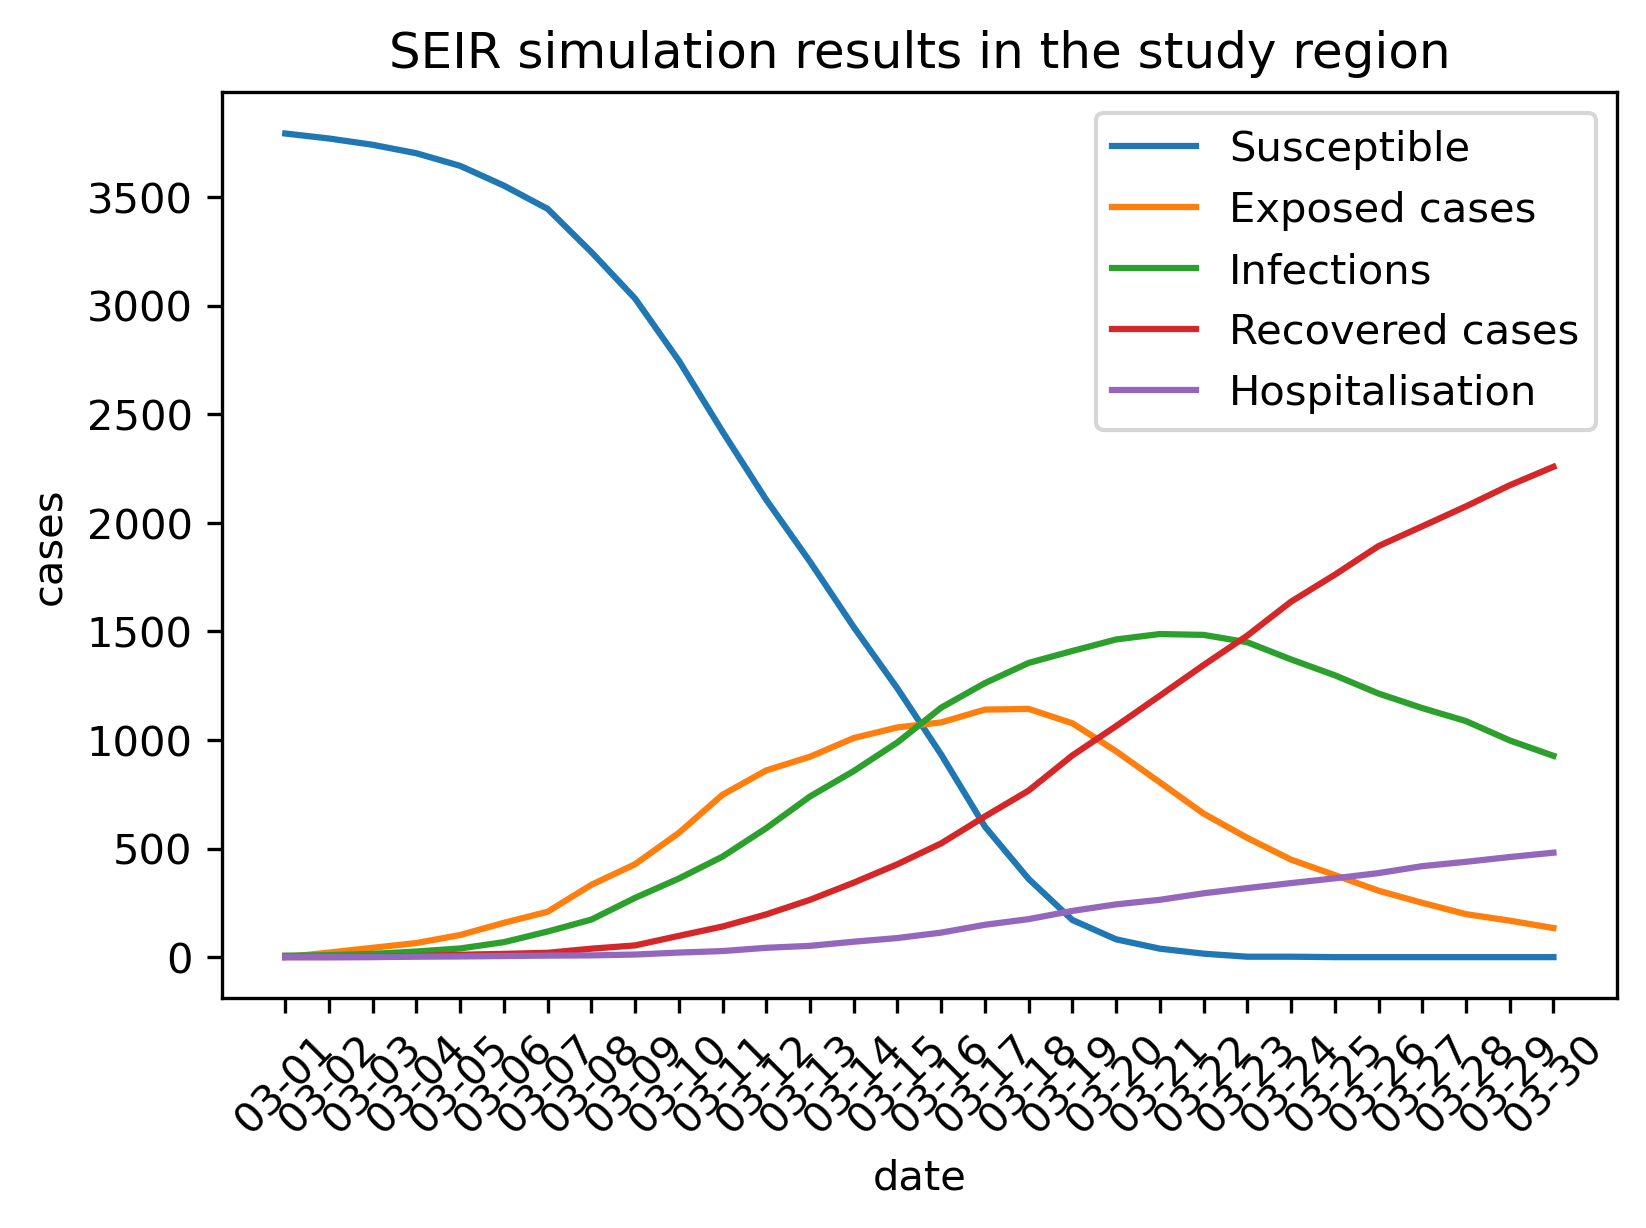

In [49]:
# static 静态展示
import math
import random
import numpy as np
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt


plt.figure(dpi=300)
# set up matplotlib


# 导入之前保存的模型结果
simulation_results = pd.read_csv(r'ABM_SEIR results/SEIR_simulation_results_new.csv',index_col = 0)

def get_date(series):    
    return series['date'].split('2022-')[1:][0]

date = simulation_results.apply(get_date,axis=1)
plt.plot(date,simulation_results['Susceptible'],label='Susceptible')
plt.plot(date,simulation_results['Exposed'],label='Exposed cases')
plt.plot(date,simulation_results['Infected'],label='Infections')
plt.plot(date,simulation_results['Recovered'],label='Recovered cases')
plt.plot(date,simulation_results['Dead'],label='Hospitalisation')
plt.legend()
plt.xlabel('date')
plt.ylabel('cases')
plt.xticks(rotation=45)
plt.title('SEIR simulation results in the study region')
plt.savefig(r'ABM_SEIR results/simulation_plot_new.png')


In [ ]:
simulation_results

In [ ]:
# dynamic 动态展示

import numpy as np
import matplotlib.pyplot as plt
%matplotlib qt
date=[]
susceptible = []
exposed = []
infected = []
recovered = []
death = []
fig = plt.figure(dpi=300)
for i in range(len(simulation_results)):
    
    date.append(simulation_results['date'][i])

    susceptible.append(simulation_results['Susceptible'][i])
    exposed.append(simulation_results['Exposed'][i])
    infected.append(simulation_results['Infected'][i])
    recovered.append(simulation_results['Recovered'][i])
    death.append(simulation_results['Dead'][i])
    
    plt.plot(date,susceptible,label='susceptible',c='green',alpha=0.8)
    plt.plot(date,exposed,label='exposed',c='orange',alpha=0.6)
    plt.plot(date,infected,label='infected',c='red',alpha=0.6)
    plt.plot(date,recovered,label='recovered',c='cyan')
    plt.plot(date,death,label='death',c='black')
    plt.legend()
    #plt.text(date[0],3500,"time = {:.2f}s".format(i))
    plt.xlabel('date')
    plt.ylabel('cases')
    plt.xticks(rotation=30)
    plt.pause(0.001)
    plt.cla()
plt.show()

In [ ]:
# generate the trajectory data for all days
import os


data_list = os.listdir(r'ABM_SEIR results')

In [ ]:
data_list[6:13]

In [ ]:
simulated_trajectories = []
for i in data_list[6:13]:
    simulated_trajectories.append(pd.read_csv('ABM_SEIR results/'+i,index_col=0))
pd.concat(simulated_trajectories).to_csv('ABM_SEIR results/'+'simulated_trajectories.csv')

In [ ]:
simulated_trajectory = pd.read_csv('ABM_SEIR results/'+'simulated_trajectories.csv')

In [ ]:
simulated_trajectory_infected = simulated_trajectory[simulated_trajectory['status']==2]

In [ ]:
simulated_trajectory_infected

In [ ]:
simulated_trajectory_infected.to_csv('ABM_SEIR results/'+'simulated_trajectories_infected.csv',index=None)

In [ ]:
simulated_trajectory_exposed = simulated_trajectory[simulated_trajectory['status']==1]

In [ ]:
simulated_trajectory_exposed.to_csv('ABM_SEIR results/'+'simulated_trajectories_exposed.csv',index=None)